## Data Science - Applications

In the field of Data Science, it is necessary to find the best model fit for classification. 

The basic concept of Decision Tree has been widely expanded into other algorithms to fit with the dataset. In order to find the best model for classification, instead of finding the depth of the tree and cross validation, there could be other alternatives such as ensemble techniques.

This section attempts to show some related Classification classifiers such as:
- Decision Tree
- Logistic Regression
- K Nearest Neighbor
- Linear Discriminant Analysis
- Gaussian Naive Bayes
- Random Forest
- Support Vector Machine

For the experiment, this section used Fruit Dataset.

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly.

In [1]:
#import the necessary packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fruits = pd.read_table('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt')
#fruits = pd.read_table('data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape #There are 59 fruits and 7 features

(59, 7)

In [4]:
print(fruits['fruit_name'].unique()) #Print four types of fruits in the dataset

['apple' 'mandarin' 'orange' 'lemon']


In [5]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


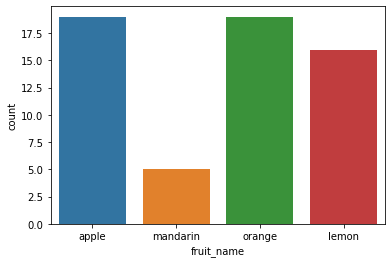

In [6]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

## Visualization

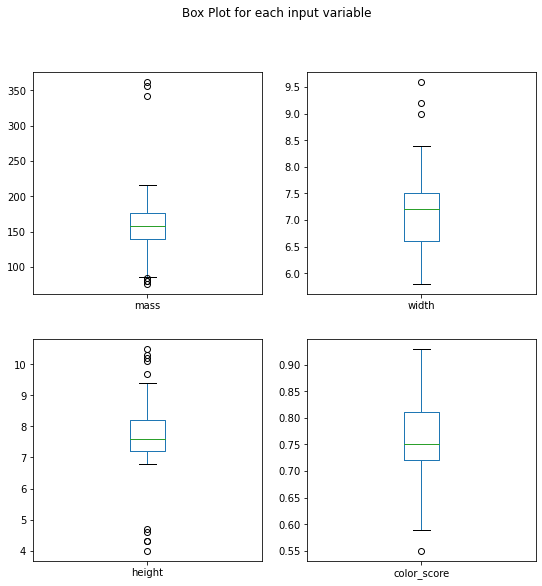

In [7]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable') # box plot : plot only the numerical data라서 drop 'fruit label'
plt.savefig('fruits_box') # 이미지 파일 저장하는 것
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

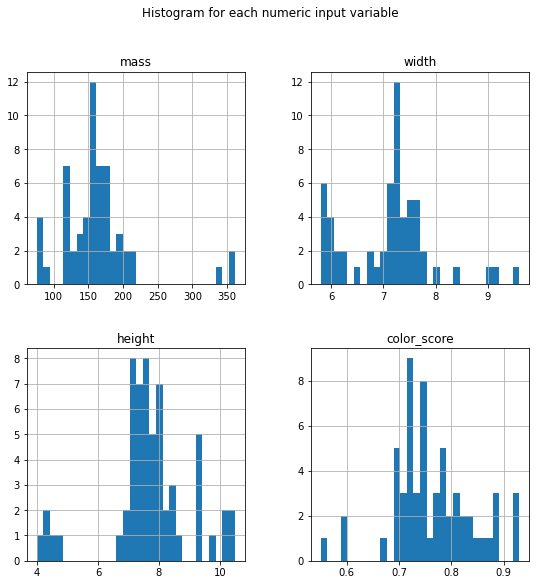

In [8]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

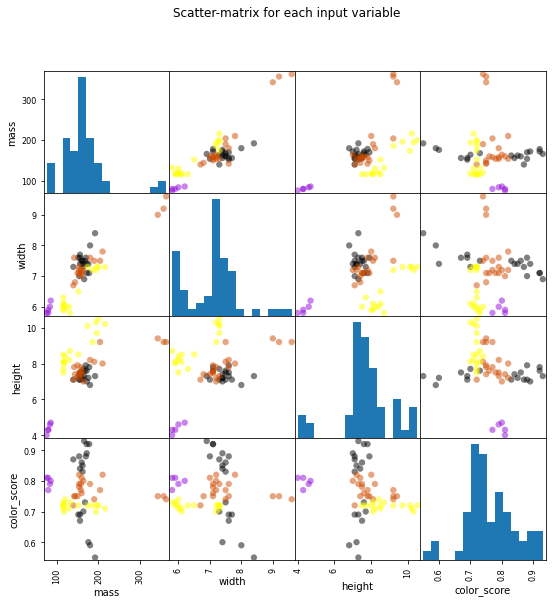

In [9]:
import pandas as pd
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

## Create Training and Test Sets and Apply Scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Transform features by scaling each feature to a given range.(Normalization)-정규화

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

$$ X_{std} = \frac{(X - X.min(axis=0))}{(X.max(axis=0) - X.min(axis=0))} $$

<br>

$$ X_{scaled} = X_{std} * (max - min) + min $$
where min, max = feature_range.

The transformation is calculated as:

$$ X_{scaled} = scale * X + min - X.min(axis=0) * scale $$
<br>

where 

$$ scale = \frac{(max - min)}{(X.max(axis=0) - X.min(axis=0))} $$

This transformation is often used as an alternative to zero mean, unit variance scaling.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build models

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
# testing result 높은게 정확히 예측가능한 것
# training 높은 것도 중요

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


### Logistic Regression(for classification)

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


### K-Nearest Neighbors (KNN)

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.


Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

Calculate distance
Find closest neighbors
Vote for labels

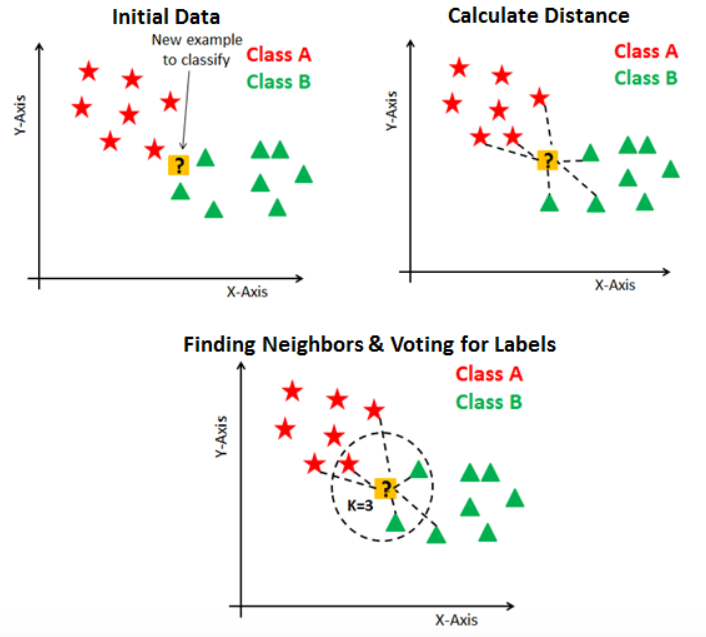

In [14]:
# k=1이면 가까운 거 하나 찾고 k=2이면 두개찾고 ..

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a simple yet powerful linear transformation or dimensionality reduction technique. Here, we are going to unravel the black box hidden behind the name LDA. The general LDA approach is very similar to a Principal Component Analysis. But in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA). 

LDA is a supervised dimensionality reduction technique. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs. Basically, the added advantage LDA gives over PCA is to tackle overfitting.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


### Gaussian Naive Bayes

One of the simplest yet effective algorithm that should be tried to solve the classification problem is Naive Bayes. It is a probabilistic method which is based on the Bayes’ theorem with the naive independence assumptions between the input attributes.

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine(for the regression)

A support vector machine (SVM) is a type of supervised machine learning classification algorithm.

In case of linearly separable data in two dimensions, as shown in Figure below, a typical machine learning algorithm tries to find a boundary that divides the data in such a way that the misclassification error can be minimized. If you closely look at the figure, there can be several boundaries that correctly divide the data points. The two dashed lines as well as one solid line classify the data correctly. 

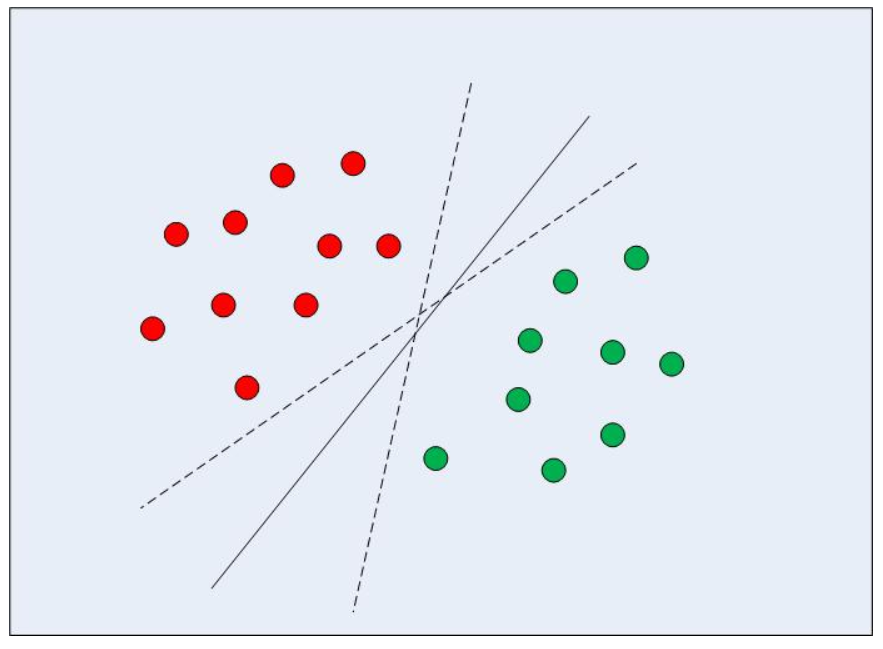

SVM differs from the other classification algorithms in the way that it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes. An SVM doesn't merely find a decision boundary; it finds the most optimal decision boundary.

The most optimal decision boundary is the one which has maximum margin from the nearest points of all the classes. The nearest points from the decision boundary that maximize the distance between the decision boundary and the points are called support vectors as seen in Fig 2. The decision boundary in case of support vector machines is called the maximum margin classifier, or the maximum margin hyper plane.

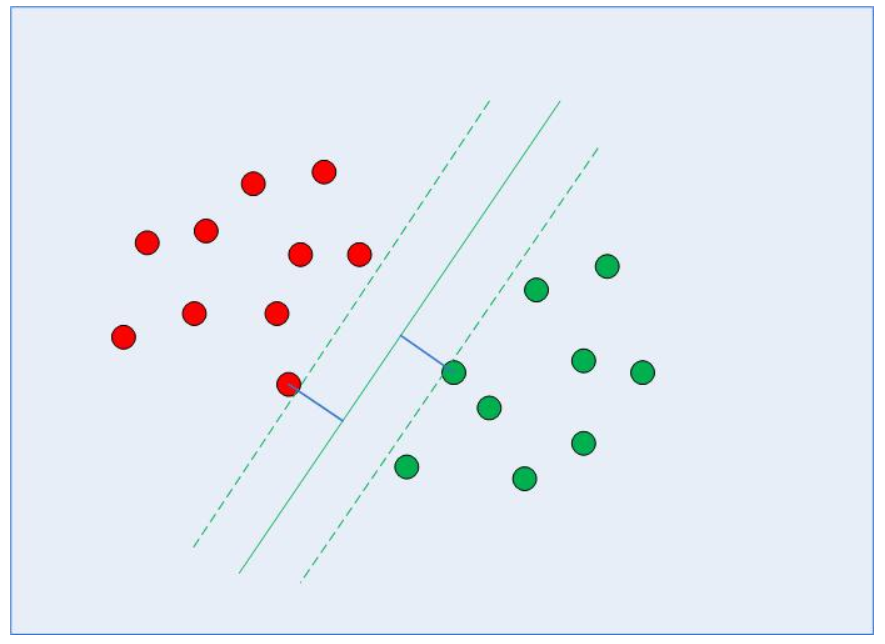

There is complex mathematics involved behind finding the support vectors, calculating the margin between decision boundary and the support vectors and maximizing this margin. In this tutorial we will not go into the detail of the mathematics, we will rather see how SVM and Kernel SVM are implemented via the Python SkLearn library.

In [18]:
from sklearn.svm import SVC # SVC : for classification
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


### Random Forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.(forests는 collection of decision tree)->parameter을 random으로 만드는 경향 있음

It works in four steps:

- Select random samples from a given dataset.
- Construct a decision tree for each sample and get a prediction result from each decision tree.
- Perform a vote for each predicted result.
- Select the prediction result with the most votes as the final prediction.

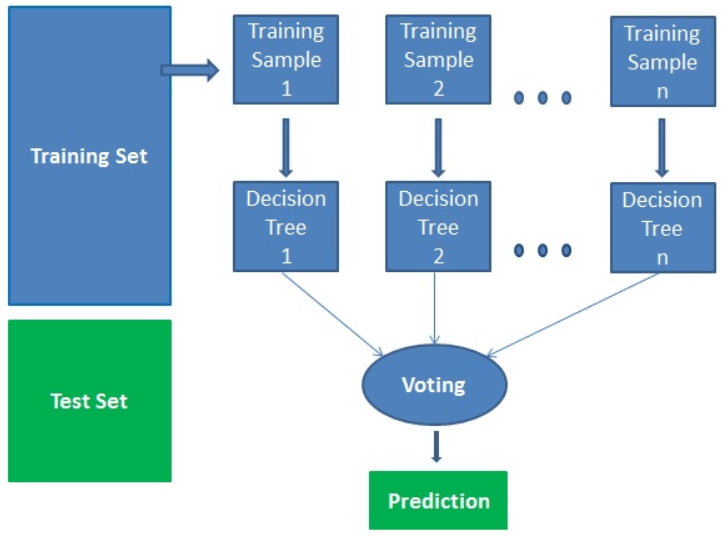

In [19]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #n_jobs=2, random_state=0
clf.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
# 이거 실행 몇번 해볼때마나 숫자 달라짐(ex) test set : 0.80-> 0.87)

Accuracy of RFC classifier on training set: 1.00
Accuracy of RFC classifier on test set: 0.87


### Confusion Matrix

After generating the classifier model, it is necessary to check the Precision, Recall, and F-1 Score for the Classification Model Result. This example only shows for the KNN. 

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
# (Apple Mandarin Orange Lemon) * (Apple Mandarin Orange Lemon)
# get accuracy at testing is 100% ( every data in the predicion is same in the actual)
# 대각선에 다 숫자가 있음

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Plot the Decision Boundary of the k-NN Classifier

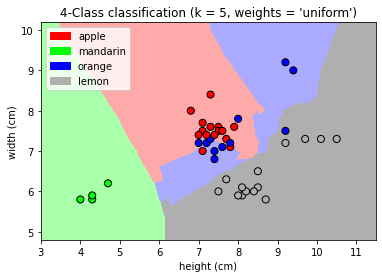

In [21]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()
    
plot_fruit_knn(X_train, y_train, 5, 'uniform')

### Summary

This section explained some relevant algorithms in Classification. While the basic algorithms (such as Gaussian Naive Bayes, Decision Tree) work for all type of data, there might be some particular issues that we need to apply other algorithms (such as Random Forest, Support Vector Machine). 
To find the best model in a particular algorithms, we need to set the parameters. For example, the Decision Tree needs a depth of tree to limit the computation, Support Vector Machine requires kernel to find the maximum hyperplane, etc. Hence, understanding the theoretical basis for each algorithm is highly recommended.

### References

https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222